In [4]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target   # 0, 1, 2

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#30% for test 70% for train

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # find sample mean and sample std by fitting
X_train_std = sc.transform(X_train) # normalize 
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        camp = ListedColormap(colors[:len(np.unique(y))])    #unique= show the aarray after deleting the repeating numbers
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)    #ravel= from matrix to 1-D array

        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, camp=camp)  #等高線圖
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        X_test, y_test = X[test_idx, :], y[test_idx]        
        for idx, c1 in enumerate(np.unique(y)):
            plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=camp(idx), marker=markers[idx], label=c1)
        
        #highlight test samples
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx, :]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidthh=1, marker='o', s=55, label='test set')

<ipython-input-10-c5a59b333776>:15: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx1, xx2, Z, alpha=0.4, camp=camp)  #等高線圖
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all

IndexError: too many indices for array

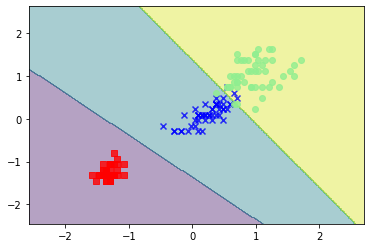

In [15]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(105,150))